In [1]:
import pandas  
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pandas.read_csv('HR_comma_sep.csv')

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])

In [4]:
# Spliting data into Feature and

X = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years','salary']]
y = data['left']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [5]:
#Import Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Classifier
rf = RandomForestClassifier()

# Train the model using the training sets
rf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = rf.predict(X_test)

In [6]:
# Import sklearn metrics
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9871111111111112
Precision: 0.9912790697674418
Recall: 0.9542910447761194


In [8]:
import shap

In [9]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

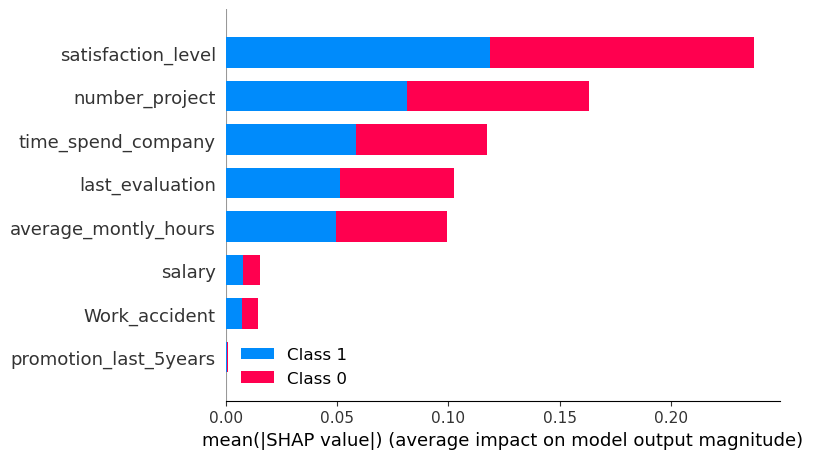

In [10]:
# Create summary_plot
shap.summary_plot(shap_values, X_test)

In [11]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

shap.plots.force is slow for many thousands of rows, try subsampling your data.
